#Import All Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.model_selection import train_test_split,cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.feature_extraction.text import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import *
import matplotlib.pyplot as pl
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
import matplotlib.pyplot as plt

print("All Library are imported correctly!")

All Library are imported correctly!


# Load Data

Mounted All Data from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


execute ls into the driver folder

In [3]:
%ls

drive/  sample_data/


Read the file "dataset.json" or "noduplicatedataset.json" from my Google Drive

In [3]:
filename= '/content/drive/My Drive/noduplicatedataset.json'
# filename= '/content/drive/My Drive/dataset.json'
data = pd.read_json(filename, lines=True)

In [4]:
print("----> Print a dataset <----\n\n\n")
data

----> Print a dataset <----





,id,semantic,lista_asm,cfg
0,828,string,"['jmp qword ptr [rip + 0x220882]', 'jmp qword ...","{'directed': True, 'graph': [], 'nodes': [{'id..."
1,11786,math,"['ucomisd xmm2, xmm2', 'jp 0x40', 'ucomisd xmm...","{'directed': True, 'graph': [], 'nodes': [{'id..."
2,12621,encryption,"['push rbx', 'mov r8d, ecx', 'mov qword ptr [r...","{'directed': True, 'graph': [], 'nodes': [{'id..."
3,11166,math,"['mov qword ptr [rsp - 0x10], rbx', 'mov qword...","{'directed': True, 'graph': [], 'nodes': [{'id..."
4,10432,sort,"['jmp qword ptr [rip + 0x200ba2]', 'jmp qword ...","{'directed': True, 'graph': [], 'nodes': [{'id..."
...,...,...,...,...
6068,12484,math,"['push rbp', 'mov rbp, rsp', 'sub rsp, 0x50', ...","{'directed': True, 'graph': [], 'nodes': [{'id..."
6069,7809,sort,"['push r15', 'push r14', 'push r13', 'push r12...","{'directed': True, 'graph': [], 'nodes': [{'id..."
6070,9806,encryption,"['test rdx, rdx', 'push rbx', 'je 0x115', 'tes...","{'directed': True, 'graph': [], 'nodes': [{'id..."
6071,421,math,"['push rbp', 'mov rbp, rsp', 'sub rsp, 0x50', ...","{'directed': True, 'graph': [], 'nodes': [{'id..."


##Vectorizer Data

In [5]:
method_to_use_for_vectorization = "TfidfVectorizer"
#method_to_use_for_vectorization = "CountVectorizer"
#method_to_use_for_vectorization = "HashingVectorizer"

if (method_to_use_for_vectorization == "TfidfVectorizer"):
  print("You choose TfidfVectorizer!")
  vectorizer = TfidfVectorizer(ngram_range=(1,4))
elif (method_to_use_for_vectorization == "CountVectorizer"):
  print("You choose CountVectorizer!")
  vectorizer = CountVectorizer()
elif (method_to_use_for_vectorization == "HashingVectorizer"):
  print("You choose HashingVectorizer!")
  vectorizer = HashingVectorizer()
else :
  print("!!!   AN ERROR WAS OCCURRED   !!!!")


You choose TfidfVectorizer!


With function ***vectorizer.fit_transform(data.lista_asm)*** the vectorizer learn vocabulary (lista_asm) and IDF, return term-document matrix.


In [6]:
X_all = vectorizer.fit_transform(data.lista_asm)
y_all = data.semantic

#Split Data

In this exercise we want to consider the output as semantic, y_all= data.semantic, so we take column of dataset labeled semantic

We use a function train_test_split to create 4 sets:

*   2 for training (data + label)
*   2 for test (data + label)

We use it to choose the size of our training set, because with it we can predict new instances that we want to classify.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3333, random_state=15)

#Create a model

Down here we find a different type of model.

**Bernoulli Model**

In [ ]:
model = BernoulliNB(alpha=1)
model.fit(X_train, y_train)

print("---->   Bernoulli Model was created   <----")

---->   Bernoulli Model was created   <----


**LogisticRegression Model**

In [8]:
model=LogisticRegression(penalty='l1', solver='saga',max_iter=10000)
model.fit(X_train, y_train)
print("---->   LogisticRegression Model was created   <----")

---->   LogisticRegression Model was created   <----


**Multinomial Model**

In [ ]:
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)
print("---->   Multinomial Model created   <----")

---->   Multinomial Model created   <----


**SVM Linear Kernel Model**

In [ ]:
model = svm.SVC(C=1.0,kernel='linear', gamma='scale')
model.fit(X_train, y_train)
print("---->   SVM Linear Kernel Model was created   <----")

---->   SVM Linear Kernel Model was created   <----


#Evaluation

##Test Set

In [9]:
y_pred = model.predict(X_test)

Plot the result

              precision    recall  f1-score   support

  encryption       0.99      0.94      0.96       396
        math       0.99      0.98      0.99       778
        sort       0.84      0.90      0.87       173
      string       0.97      0.99      0.98       678

    accuracy                           0.97      2025
   macro avg       0.95      0.95      0.95      2025
weighted avg       0.97      0.97      0.97      2025



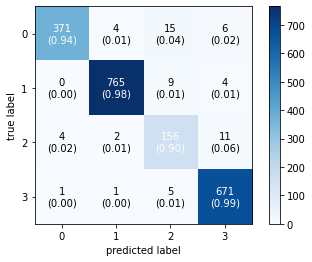

In [10]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,colorbar=True,show_absolute=True,show_normed=True)
print(classification_report(y_test, y_pred))


##Train Set

In [11]:
y_pred_train = model.predict(X_train)

Plot Result

              precision    recall  f1-score   support

  encryption       0.98      0.95      0.97       714
        math       0.99      0.99      0.99      1634
        sort       0.91      0.93      0.92       364
      string       0.98      1.00      0.99      1336

    accuracy                           0.98      4048
   macro avg       0.97      0.97      0.97      4048
weighted avg       0.98      0.98      0.98      4048



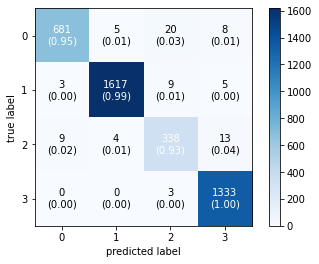

In [12]:
cm_train = confusion_matrix(y_train,y_pred_train)
fig_train, ax_train = plot_confusion_matrix(conf_mat=cm_train,colorbar=True,show_absolute=True,show_normed=True)
print(classification_report(y_train, y_pred_train))

#Networkx

---
WARNING!


This part is made only for a personal scope. It could not work.

---

In [24]:
import json
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from networkx import json_graph

NumberOfLoops = []
ComplexyList = []
SimpleNumberCyrcleList = []
DiameterList = []
Instruction = []
string
def complexity(G):
    edges = len(G.edges())
    nodes = len(G.nodes())
    parts = nx.components.number_strongly_connected_components(G)
    return edges - nodes + parts

def convert_list_to_string(org_list, seperator=' '):
    return seperator.join(org_list)

with open("/content/drive/My Drive/noduplicatedataset.json",'r') as f:
    lines = f.readlines()
    countItem = 0
    NoneCount = 0
    n_cycles = 0
    vectorizer = TfidfVectorizer(max_features=50000, use_idf=True,min_df = 1,lowercase = False, stop_words='english',ngram_range=(1,4),token_pattern=r'(?u)\b[A-Za-z]+\b')
    instructionList = []

    for item in lines:
        d = json.loads(item)
        nx_graph = json_graph.adjacency_graph(d['cfg'])

        n_edges = nx_graph.number_of_edges()
        n_nodes = nx_graph.number_of_nodes()

        try:
          cycles = nx.find_cycle(nx_graph)
          n_cycles = len(cycles)
        except nx.NetworkXNoCycle as e:
          pass

        #print("--->  Number of loops = ")
        #print(n_cycles)

        #print("--->  Complexy = ")
        #print(complexity(nx_graph))
        ComplexyList.append(complexity(nx_graph))
        count = 0
        for i,n in nx_graph.nodes(data=True):
          
          label = n['label']
          
          if (label == None):
            NoneCount += 1
            continue

          #print(label)
          # label = map(lambda s: s.strip(), label)
          count += 1
          try:
            X = vectorizer.fit_transform([label])
          except ValueError as e:
            pass
          feature_names = vectorizer.get_feature_names() 

          instructionList.append(feature_names)

        for i in range(count):
          string+=convert_list_to_string(instructionList[i])

        instructionList = []
        Instruction.append(string)
        string = ""
        # if (count == n_nodes):
        #   print("CORRECT")

        # print("COUNT ITEM : ")
        # print(countItem)

        countItem += 1


In [ ]:

y_all = data.semantic
X_train, X_test, y_train, y_test = train_test_split(X, y_all, test_size=0.33, random_state=8)

model=LogisticRegression(penalty='l1', solver='saga',max_iter=10000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,colorbar=True,show_absolute=True,show_normed=True)
print(classification_report(y_test, y_pred))


#Blind

The blind test contains the input data to classify with a model that i have choose for prededict a *semantic*

In [13]:
filename_new= '/content/drive/My Drive/blindtest.json'
data_new = pd.read_json(filename_new, lines=True)

In this case we use trasform instruction of vectorizer only because we don't want learn vocabulary but we want only that it transforms instructions.

And after make predictions using model.


In [14]:
X_all_to_predict=vectorizer.transform(data_new.lista_asm)
y_pred_new= model.predict(X_all_to_predict)

Now we want to creare TXT file, so we write in this file in such way we can obtain for each line only the prediction like:

*   *Encryption*;
*   *String Manipulation*;
*   *Math*;
*   *Sorting*.



In [15]:
y_pred_new

array(['encryption', 'math', 'string', 'string', 'math', 'string', 'sort',
       'sort', 'sort', 'math', 'math', 'math', 'sort', 'encryption',
       'encryption', 'math', 'string', 'string', 'math', 'math', 'math',
       'string', 'encryption', 'math', 'encryption', 'string', 'string',
       'math', 'math', 'sort', 'string', 'sort', 'encryption',
       'encryption', 'string', 'sort', 'string', 'math', 'sort', 'string',
       'string', 'math', 'sort', 'math', 'sort', 'sort', 'sort', 'string',
       'string', 'string', 'sort', 'math', 'math', 'string', 'math',
       'string', 'math', 'math', 'math', 'math', 'encryption', 'sort',
       'math', 'string', 'string', 'sort', 'math', 'string', 'sort',
       'sort', 'encryption', 'sort', 'string', 'sort', 'math', 'sort',
       'sort', 'sort', 'sort', 'sort', 'encryption', 'encryption', 'math',
       'sort', 'string', 'math', 'string', 'math', 'encryption', 'math',
       'string', 'string', 'string', 'sort', 'sort', 'string', 'math'

In [16]:
countMath=0
countSort=0
countEncryption=0
countString=0
with open('/content/drive/My Drive/resultBlind.txt','w') as file:
  for index in range (0, len(y_pred_new)):

    if (y_pred_new[index]=='math'):
      countMath = countMath + 1
    elif (y_pred_new[index]=='sort'):
      countSort = countSort + 1
    elif (y_pred_new[index]=='encryption'):
      countEncryption = countEncryption + 1
    elif (y_pred_new[index]=='string'):
      countString = countString + 1


    file.write(y_pred_new[index])
    file.write('\n')
file.close()

print("Math :", countMath)
print("Sort :", countSort)
print("Encryption :", countEncryption)
print("String :", countString)

Math : 229
Sort : 213
Encryption : 124
String : 191
